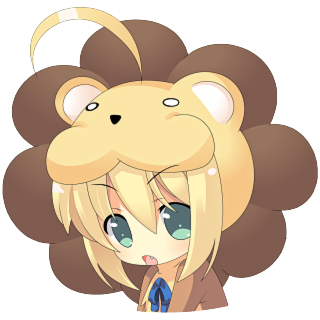

# <center>Manila, Philippines Shell Fuel Price</center>

### Libraries

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)
%matplotlib inline

In [283]:
df1 = pd.read_csv("./Manila Shell Fuel Price.csv")
cols = ['Diesel', 'RON91']
Q1 = df1[cols].quantile(0.25)
Q3 = df1[cols].quantile(0.75)
IQR = Q3 - Q1
df1 = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df1.head(10), "\n ... \n", df1.tail(10))

        Date  Diesel  RON91
0   1/2/2022   50.82  63.30
1   1/6/2022   53.22  65.15
2  1/13/2022   54.32  65.90
3  1/20/2022   56.12  66.80
4  1/27/2022   57.32  66.50
5   2/3/2022   58.07  67.25
6  2/10/2022   59.27  68.30
7  2/17/2022   60.32  69.50
8  2/24/2022   60.97  70.30
9   3/3/2022   60.72  71.20 
 ... 
          Date  Diesel  RON91
31   8/4/2022   76.70  74.55
32  8/11/2022   74.50  72.45
33  8/18/2022   73.35  72.35
34  8/25/2022   75.95  73.05
35   9/1/2022   82.05  74.45
36   9/6/2022   80.50  71.35
37  9/15/2022   79.05  70.90
38  9/23/2022   75.10  69.65
39  9/29/2022   72.15  67.98
40  10/6/2022   71.50  67.08


In [284]:
df1.isnull().values.any()

False

In [285]:
df1.describe()

,Diesel,RON91
count,41.000000,41.000000
mean,72.466098,73.980976
std,10.390486,6.076475
min,50.820000,63.300000
25%,65.900000,69.650000
50%,74.500000,73.050000
75%,79.720000,78.280000
max,90.900000,85.750000


In [286]:
fig = px.line(title="Manila Shell Fuel Price", markers=True)
fig.add_scatter(x=df1['Date'], y=df1['Diesel'], mode='lines', line_color="#ff0000", name="Diesel")
fig.add_scatter(x=df1['Date'], y=df1['RON91'], mode='lines', line_color="#0066ff", name="Gasoline")
fig.show()

In [287]:
lm=LinearRegression()
lm

LinearRegression()

In [288]:
df2 = df1.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date']= df2['Date'].map(dt.datetime.toordinal)

In [289]:
X = df2[['Date']]
Y = df2['Diesel']
lm.fit(X,Y)
lm.score(X,Y)

0.5252259315421763

In [290]:
df3 = pd.DataFrame({'Date': ["10/15/2022", "10/25/2022", "11/6/2022", "11/15/2022", "11/25/2022", "12/6/2022", "12/15/2022", "12/30/2022"]})
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Date']= df3['Date'].map(dt.datetime.toordinal)
Z = df3[['Date']]
lm.predict(Z)
Diesel = lm.predict(Z)

In [293]:
X = df2[['Date']]
Y = df2['RON91']
lm.fit(X,Y)
lm.score(X,Y)

0.10738307183380735

In [294]:
df3 = pd.DataFrame({'Date': ["10/15/2022", "10/25/2022", "11/6/2022", "11/15/2022", "11/25/2022", "12/6/2022", "12/15/2022", "12/30/2022"]})
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Date']= df3['Date'].map(dt.datetime.toordinal)
Z = df3[['Date']]
lm.predict(Z)
Gasoline = lm.predict(Z)

In [295]:
df_result = pd.DataFrame({'Date': ["10/15/2022", "10/25/2022", "11/6/2022", "11/15/2022", "11/25/2022", "12/6/2022", "12/15/2022", "12/30/2022"], 'Diesel': np.round(Diesel, 2), 'RON91': np.round(Gasoline, 2)})
print("Fuel Price Forecast:")
df_result

Fuel Price Forecast:


,Date,Diesel,RON91
0,10/15/2022,85.87,77.53
1,10/25/2022,86.77,77.76
2,11/6/2022,87.85,78.05
3,11/15/2022,88.66,78.26
4,11/25/2022,89.56,78.50
5,12/6/2022,90.55,78.76
6,12/15/2022,91.36,78.98
7,12/30/2022,92.71,79.33


In [296]:
frames = [df1, df_result]
result = pd.concat(frames)

In [297]:
fig = px.line(title="Manila Shell Fuel Price Forecast", markers=True)
fig.add_scatter(x=result['Date'], y=result['Diesel'], mode='lines', line_color="#ff0000", name="Diesel")
fig.add_scatter(x=result['Date'], y=result['RON91'], mode='lines', line_color="#0066ff", name="Gasoline")
fig.show()